# Classification algorithms

### Dataset description, visualisation, and pre-processing

<div class="alert alert-block alert-warning">The Heart Disease Detection dataset is composed of a set of characteristics used to determine if a patient has heart disease or not. Its main purpose is to perform classification based on the target variable, 'HeartDisease,' which indicates the presence of heart disease in the patient. This variable has integer values where 0 represents no disease and 1 indicates the presence of disease.
<div/>

<div class="alert alert-block alert-danger"> 
    
1. Import the Heart Disease Detection dataset.
2. Display and try to understand each feature in this dataset.
3. Display a summary of the dataset.
4. Verify if the dataset contains any missing values.
5. Plot the distribution of samples according to the target variable HeartDisease. Determine if the dataset is balanced.
6. Apply dummy encoding to all categorical features in the dataset.
7. Display the Pearson correlation matrix. Is there a correlation with the class and between features by considering a thresholed of 0.5?
8. Display the distribution of all features on all the scaled data (except binary features) using a histplot. What do you observe?
9. Split the data into a training and a testing set using a ratio of 0.3.
10. Normalize the data using z-score scaling.
<div/>

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Import the Heart Disease Detection dataset.


In [4]:
dataset = pd.read_csv(('heart.csv'))

#### 2. Display and try to understand each feature in this dataset.


In [5]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


The `dataset` contain the following features:

1. **Age**: Age of the patient.
2. **Sex**: Gender of the patient (***M*** for Male, ***F*** for Female).
3. **ChestPainType**: Type of chest pain (e.g., ATA, NAP, ASY, etc.).
4. **RestingBP**: Resting blood pressure (in mm Hg).
5. **Cholesterol**: Serum cholesterol level (in $mg/dl$).
6. **FastingBS**: Fasting blood sugar (`0 if <120 mg/dl, 1 if ≥120 mg/dl`).
7. **RestingECG**: Resting electrocardiographic results (e.g., Normal, ST, etc.).
8. **MaxHR**: Maximum heart rate achieved.
9. **ExerciseAngina**: Exercise-induced angina (***Y*** for Yes, ***N*** for No).
11. **Oldpeak**: Depression induced by exercise relative to rest.
12. **ST_Slope**: Slope of the peak exercise ST segment (e.g., Up, Flat, Down).
13. **HeartDisease**: Target variable ($1$ for presence of heart disease, $0$ for absence).

#### 3. Display a summary of the dataset.


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### 4. Verify if the dataset contains any missing values.


In [11]:
dataset.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

The dataset does not contains any missing values

#### 5. Plot the distribution of samples according to the target variable HeartDisease. Determine if the dataset is balanced.


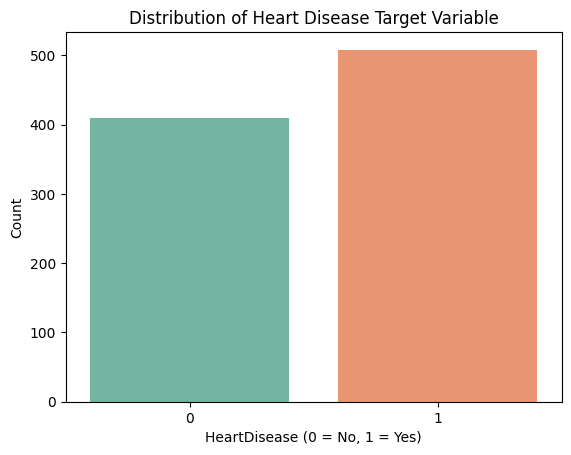

In [ ]:
sns.countplot(data=dataset, x='HeartDisease', hue='HeartDisease', palette='Set2', legend=False)
plt.title('Distribution of Heart Disease Target Variable')
plt.xlabel('HeartDisease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

#### 6. Apply dummy encoding to all categorical features in the dataset.


In [59]:
categorical_columns = dataset.select_dtypes(include=['object']).columns.tolist()
dataset_encoded = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)
dataset_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


#### 7. Display the Pearson correlation matrix. Is there a correlation with the class and between features by considering a thresholed of 0.5?



In [61]:
corr_matrix = dataset_encoded.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
Age,1.00,0.25,-0.10,0.20,-0.38,0.26,0.28,0.06,-0.22,-0.01,0.03,-0.23,0.14,0.22,0.19,-0.26
RestingBP,0.25,1.00,0.10,0.07,-0.11,0.16,0.11,0.01,-0.05,-0.04,0.05,-0.12,0.09,0.16,0.10,-0.10
Cholesterol,-0.10,0.10,1.00,-0.26,0.24,0.05,-0.23,-0.20,0.15,-0.01,0.02,-0.04,-0.13,-0.03,-0.05,0.09
FastingBS,0.20,0.07,-0.26,1.00,-0.13,0.05,0.27,0.12,-0.14,-0.04,0.03,-0.09,0.13,0.06,0.11,-0.16
MaxHR,-0.38,-0.11,0.24,-0.13,1.00,-0.16,-0.40,-0.19,0.25,0.13,0.10,0.02,-0.16,-0.37,-0.34,0.38
Oldpeak,0.26,0.16,0.05,0.05,-0.16,1.00,0.40,0.11,-0.26,-0.11,0.03,-0.12,0.06,0.41,0.28,-0.45
HeartDisease,0.28,0.11,-0.23,0.27,-0.40,0.40,1.00,0.31,-0.40,-0.21,-0.05,-0.09,0.10,0.49,0.55,-0.62
Sex_M,0.06,0.01,-0.20,0.12,-0.19,0.11,0.31,1.00,-0.16,-0.07,-0.00,-0.01,0.06,0.19,0.12,-0.15
ChestPainType_ATA,-0.22,-0.05,0.15,-0.14,0.25,-0.26,-0.40,-0.16,1.00,-0.26,-0.11,0.11,-0.05,-0.30,-0.30,0.36
ChestPainType_NAP,-0.01,-0.04,-0.01,-0.04,0.13,-0.11,-0.21,-0.07,-0.26,1.00,-0.12,0.01,-0.04,-0.17,-0.07,0.09


In [62]:
threshold = 0.5
target_corr = corr_matrix['HeartDisease']
columns_corr = target_corr[abs(target_corr) >= 0.5].drop('HeartDisease').index.to_list
print(columns_corr)

<bound method IndexOpsMixin.tolist of Index(['ST_Slope_Flat', 'ST_Slope_Up'], dtype='object')>


#### 8. Display the distribution of all features on all the scaled data (except binary features) using a histplot. What do you observe?


In [74]:
plt.figure(figsize=(16, 20))

cont_val_columns = list(dataset.columns.values)
print(cont_val_columns.remove('HeartDisease'))
# for col in cont_val_columns:
#     plt.subplot(5, 4, cont_val_columns.tolist().index(col) + 1)
#     sns.histplot(data=dataset ,x=dataset[col], kde=True, hue='HeartDisease')
    
# plt.show()

None


<Figure size 1600x2000 with 0 Axes>

#### 9. Split the data into a training and a testing set using a ratio of 0.3.


In [52]:
from sklearn.model_selection import train_test_split
X = dataset_encoded.drop('HeartDisease', axis=1)
y = dataset_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [53]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
76,32,118,529,0,130,0,1,0,0,0,1,0,0,1,0
48,36,112,340,0,184,1,1,0,1,0,1,0,0,1,0
304,51,95,0,1,126,2,1,0,0,0,1,0,0,1,0
263,59,130,126,0,125,0,1,0,0,0,1,0,0,1,0
744,60,117,230,1,160,1,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,54,110,239,0,126,2,1,0,0,0,1,0,1,1,0
192,48,130,245,0,160,0,1,1,0,0,1,0,0,0,1
629,57,128,303,0,159,0,0,0,0,0,0,0,0,0,1
559,64,134,273,0,102,4,1,0,0,0,1,0,1,0,0


In [54]:
X_test

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
306,55,115,0,1,155,0,1,0,0,0,1,0,0,1,0
711,66,120,302,0,151,0,1,0,0,0,0,0,0,1,0
298,51,110,0,1,92,0,1,0,0,0,1,0,0,1,0
466,55,120,0,0,125,2,1,0,1,0,0,1,1,1,0
253,62,140,271,0,152,1,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,41,110,289,0,170,0,1,0,0,0,1,0,0,1,0
456,61,120,0,0,80,0,1,0,1,0,1,0,1,1,0
342,61,110,0,1,113,1,1,0,0,0,1,0,0,1,0
907,44,120,169,0,144,2,1,0,0,0,1,0,1,0,0


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_to_scale = X.select_dtypes(include=['int64', 'float64'])
features_to_scale

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,0,1,0,0,0,0,0,1,0


#### 10. Normalize the data using z-score scaling.